
# Time Series Data Formats Made Easy
- darts
- gluonts
- sktime
- pmdarima
- neuralprophet



### Installation

In [36]:
# !pip install pandas numpy matplotlib darts gluonts sktime pmdarima neuralprophet

In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### If you use Google Colab, use the following code

In [38]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = '/content/gdrive/My Drive/data/time_series'
# https://www.kaggle.com/datasets/yasserh/walmart-dataset

# path = '/Users/data'
# data = pd.read_csv(path + '/walmart.csv', delimiter=",")
# data['ds'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
# data.index = data['ds']
# data = data.drop('Date', axis=1)
# data.head()

In [39]:
path = '/Users/chriskuo/Downloads/data'
data = pd.read_csv(path + '/walmart.csv', delimiter=",")
data['ds'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.index = data['ds']
data = data.drop('Date', axis=1)
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ds
ds,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05


In [40]:
data.dtypes

Store                    int64
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
ds              datetime64[ns]
dtype: object

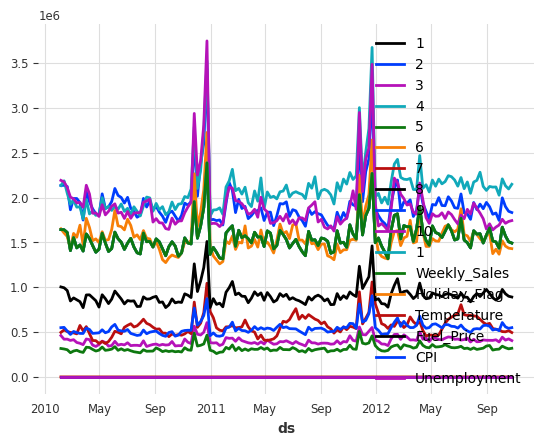

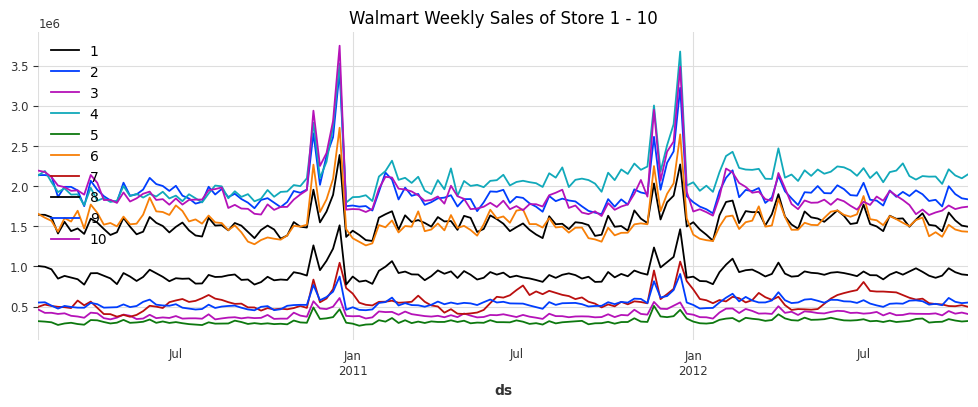

In [41]:
# pivot the data into the correct shape
storewide = data.pivot(index='ds', columns='Store', values='Weekly_Sales')
storewide = storewide.loc[:,1:10] # Plot only Store 1 - 10
# plot the pivoted dataframe
storewide.plot(figsize=(12, 4))
plt.legend(loc='upper left')
plt.title("Walmart Weekly Sales of Store 1 - 10")
plt.show()

In [42]:
storewide

Store,1,2,3,4,5,6,7,8,9,10
ds,,,,,,,,,,
2010-02-05,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75
2010-02-12,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96
2010-03-05,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1437059.26,1746470.56,389813.02,2027620.23,310141.68,1369131.46,525545.76,884724.41,516361.06,1694862.41
2012-10-05,1670785.97,1998321.04,443557.65,2209835.43,343048.29,1518177.71,505830.56,976436.02,606755.30,1758971.38
2012-10-12,1573072.81,1900745.13,410804.39,2133026.07,325345.41,1459396.84,503463.93,927511.99,558464.80,1713889.11


In [43]:
print(storewide.index)

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='ds', length=143, freq=None)


## Darts

In [44]:
from darts import TimeSeries
darts_df = TimeSeries.from_dataframe(storewide)
darts_df

<TimeSeries (DataArray) (ds: 143, component: 10, sample: 1)> Size: 11kB
array([[[1643690.9 ],
        [2136989.46],
        [ 461622.22],
        ...,
        [1004137.09],
        [ 549505.55],
        [2193048.75]],

       [[1641957.44],
        [2137809.5 ],
        [ 420728.96],
        ...,
        [ 994801.4 ],
        [ 552677.48],
        [2176028.52]],

       [[1611968.17],
        [2124451.54],
        [ 421642.19],
        ...,
...
        ...,
        [ 927511.99],
        [ 558464.8 ],
        [1713889.11]],

       [[1508068.77],
        [1847990.41],
        [ 424513.08],
        ...,
        [ 900309.75],
        [ 542009.46],
        [1734834.82]],

       [[1493659.74],
        [1834458.35],
        [ 405432.7 ],
        ...,
        [ 891671.44],
        [ 549731.49],
        [1744349.05]]])
Coordinates:
  * ds         (ds) datetime64[ns] 1kB 2010-02-05 2010-02-12 ... 2012-10-26
  * component  (component) <U2 80B '1' '2' '3' '4' '5' '6' '7' '8' '9' '10'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [45]:
darts_df.plot()

<Axes: xlabel='ds'>

In [46]:
darts_str1 = TimeSeries.from_series(storewide[1])
darts_str1

<TimeSeries (DataArray) (ds: 143, component: 1, sample: 1)> Size: 1kB
array([[[1643690.9 ]],

       [[1641957.44]],

       [[1611968.17]],

       [[1409727.59]],

       [[1554806.68]],

       [[1439541.59]],

       [[1472515.79]],

       [[1404429.92]],

       [[1594968.28]],

       [[1545418.53]],

...

       [[1494122.38]],

       [[1582083.4 ]],

       [[1661767.33]],

       [[1517428.87]],

       [[1506126.06]],

       [[1437059.26]],

       [[1670785.97]],

       [[1573072.81]],

       [[1508068.77]],

       [[1493659.74]]])
Coordinates:
  * ds         (ds) datetime64[ns] 1kB 2010-02-05 2010-02-12 ... 2012-10-26
  * component  (component) <U1 4B '1'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [47]:
darts_str1.plot()

<Axes: xlabel='ds'>

In [48]:
from darts import TimeSeries
print(type(darts_df))                # should be <class 'darts.timeseries.TimeSeries'>
print(isinstance(darts_df, TimeSeries))  # should return True


<class 'darts.timeseries.TimeSeries'>
True


In [49]:
import darts
print(darts.__version__)


0.35.0


In [72]:
# Convert a darts dataframe to pandas dataframe
#darts_to_pd = TimeSeries.pd_dataframe(darts_df)
#darts_to_pd

In [73]:
# Export all series to numpy array containing the values of all series.
# https://unit8co.github.io/darts/userguide/timeseries.html#exporting-data-from-a-timeseries
TimeSeries.all_values(darts_df)

array([[[1643690.9 ],
        [2136989.46],
        [ 461622.22],
        ...,
        [1004137.09],
        [ 549505.55],
        [2193048.75]],

       [[1641957.44],
        [2137809.5 ],
        [ 420728.96],
        ...,
        [ 994801.4 ],
        [ 552677.48],
        [2176028.52]],

       [[1611968.17],
        [2124451.54],
        [ 421642.19],
        ...,
        [ 963960.37],
        [ 511327.9 ],
        [2113432.58]],

       ...,

       [[1573072.81],
        [1900745.13],
        [ 410804.39],
        ...,
        [ 927511.99],
        [ 558464.8 ],
        [1713889.11]],

       [[1508068.77],
        [1847990.41],
        [ 424513.08],
        ...,
        [ 900309.75],
        [ 542009.46],
        [1734834.82]],

       [[1493659.74],
        [1834458.35],
        [ 405432.7 ],
        ...,
        [ 891671.44],
        [ 549731.49],
        [1744349.05]]])

In [74]:
data[data['Store']==1].head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ds
ds,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05


In [75]:
data[data['Store']==2].head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ds
ds,,,,,,,,
2010-02-05,2,2136989.46,0,40.19,2.572,210.752605,8.324,2010-02-05
2010-02-12,2,2137809.50,1,38.49,2.548,210.897994,8.324,2010-02-12
2010-02-19,2,2124451.54,0,39.69,2.514,210.945160,8.324,2010-02-19
2010-02-26,2,1865097.27,0,46.10,2.561,210.975957,8.324,2010-02-26
2010-03-05,2,1991013.13,0,47.17,2.625,211.006754,8.324,2010-03-05


In [76]:
data.index = pd.DatetimeIndex(data['ds'])
darts_group_df = TimeSeries.from_group_dataframe(data, group_cols='Store', time_col='ds')
print("The number of groups/stores is:", len(darts_group_df))
print("The number of time period is: ", len(darts_group_df[0]))

The number of groups/stores is: 45
The number of time period is:  143


In [77]:
darts_group_df

[<TimeSeries (DataArray) (ds: 143, component: 6, sample: 1)> Size: 7kB
 array([[[1.64369090e+06],
         [0.00000000e+00],
         [4.23100000e+01],
         [2.57200000e+00],
         [2.11096358e+02],
         [8.10600000e+00]],
 
        [[1.64195744e+06],
         [1.00000000e+00],
         [3.85100000e+01],
         [2.54800000e+00],
         [2.11242170e+02],
         [8.10600000e+00]],
 
        [[1.61196817e+06],
         [0.00000000e+00],
         [3.99300000e+01],
         [2.51400000e+00],
         [2.11289143e+02],
         [8.10600000e+00]],
 ...
        [[1.57307281e+06],
         [0.00000000e+00],
         [6.29900000e+01],
         [3.60100000e+00],
         [2.23381296e+02],
         [6.57300000e+00]],
 
        [[1.50806877e+06],
         [0.00000000e+00],
         [6.79700000e+01],
         [3.59400000e+00],
         [2.23425723e+02],
         [6.57300000e+00]],
 
        [[1.49365974e+06],
         [0.00000000e+00],
         [6.91600000e+01],
         [3.50600000

In [78]:
darts_group_df[0].components

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object', name='component')

In [79]:
darts_group_df[0].plot()

<Axes: xlabel='ds'>

## Gluonts
- Gluonts requires dataset.train to be an iterable collection of data entries used for training. Each entry corresponds to one time series.
- dataset.test is an iterable collection of data entries used for testing. The test dataset is an extended version of the train dataset that contains a window in the end of each time series that was not seen during training. This window has length equal to the recommended prediction length.
- dataset.metadata contains metadata of the dataset such as the frequency of the time series, a recommended prediction horizon, associated features, etc.
- A ListDataset is the format required by GluonTS. This function simplifies creating a GluonTS ListDataset.

In [80]:
# Method 1: from a long-form
from gluonts.dataset.pandas import PandasDataset
data_long_gluonts = PandasDataset.from_long_dataframe(data, target="Weekly_Sales", item_id="Store", timestamp='ds', freq='W')

In [81]:
data_long_gluonts

PandasDataset<size=45, freq=W, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [82]:
# Method 2: from a wide-form
from gluonts.dataset.pandas import PandasDataset
data_wide_gluonts = PandasDataset(dict(storewide))
data_wide_gluonts

PandasDataset<size=10, freq=W-FRI, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [83]:
# Convert a gluonts data to a pandas long-form data
# Either long-form or wide-form

the_gluonts_data = data_wide_gluonts # you can also test data_long_gluonts

timestamps = []
target_values = []
index = []

# Iterate through the GluonTS dataset
for i, entry in enumerate(the_gluonts_data):
    timestamp = entry["start"]
    targets = entry["target"]
    
    # Append timestamp and target values for each observation
    for j, target in enumerate(targets):
        timestamps.append(timestamp)
        target_values.append(target)
        index.append(i)  # Keep track of the original index for each observation

# Create a pandas DataFrame
df = pd.DataFrame({
    "timestamp": timestamps,
    "target": target_values,
    "original_index": index
})

print(df)

                  timestamp      target  original_index
0     2010-01-30/2010-02-05  1643690.90               0
1     2010-01-30/2010-02-05  1641957.44               0
2     2010-01-30/2010-02-05  1611968.17               0
3     2010-01-30/2010-02-05  1409727.59               0
4     2010-01-30/2010-02-05  1554806.68               0
...                     ...         ...             ...
1425  2010-01-30/2010-02-05  1694862.41               9
1426  2010-01-30/2010-02-05  1758971.38               9
1427  2010-01-30/2010-02-05  1713889.11               9
1428  2010-01-30/2010-02-05  1734834.82               9
1429  2010-01-30/2010-02-05  1744349.05               9

[1430 rows x 3 columns]


In [84]:
from gluonts.dataset.split import split
training_data, test_gen = split(data_long_gluonts, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

In [85]:
print("The time series has", storewide.shape[0], "weeks")

The time series has 143 weeks


In [86]:
len_train = int(storewide.shape[0] * 0.85)
len_test =  storewide.shape[0] - len_train 
train_data = storewide[0:len_train]
test_data = storewide[len_train:]
[train_data.shape, test_data.shape]

[(121, 10), (22, 10)]

In [87]:
len_test

22

In [88]:
train_data

Store,1,2,3,4,5,6,7,8,9,10
ds,,,,,,,,,,
2010-02-05,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75
2010-02-12,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96
2010-03-05,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09
...,...,...,...,...,...,...,...,...,...,...
2012-04-27,1468928.37,1764133.09,394616.11,2064065.66,324839.74,1456221.10,467827.75,879448.25,550414.99,1712987.56
2012-05-04,1684519.99,1923957.09,439913.57,2196968.33,360932.69,1543461.12,465198.89,937232.09,586289.08,1821364.42
2012-05-11,1611096.05,1917520.99,431985.36,2127661.17,333870.52,1517075.67,460397.41,920128.89,592572.30,1792345.30


In [89]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

def convert_to_gluonts_format(dataframe, freq):
    start_index = dataframe.index.min()
    data = [{
                FieldName.START:  start_index,
                FieldName.TARGET:  dataframe[c].values,
            }
            for c in dataframe.columns]
    #print(data[0])
    return ListDataset(data, freq=freq)
train_data_lds = convert_to_gluonts_format(train_data, 'W')
test_data_lds = convert_to_gluonts_format(test_data, 'W')

In [90]:
train_data_lds

[{'start': Period('2010-02-01/2010-02-07', 'W-SUN'),
  'target': array([1643690.9, 1641957.5, 1611968.1, 1409727.6, 1554806.6, 1439541.6,
         1472515.8, 1404429.9, 1594968.2, 1545418.5, 1466058.2, 1391256.1,
         1425100.8, 1603955.1, 1494251.5, 1399662.1, 1432070. , 1615524.8,
         1542561.1, 1503284. , 1422711.6, 1492418.1, 1546074.1, 1448938.9,
         1385065.2, 1371986.6, 1605491.8, 1508237.8, 1513080.5, 1449142.9,
         1540163.5, 1507460.8, 1430378.6, 1351791. , 1453329.5, 1508239.9,
         1459409.1, 1345454. , 1384209.2, 1551659.2, 1494479.5, 1483784.1,
         1955624.1, 1548033.8, 1682614.2, 1891034.9, 2387950.2, 1367320. ,
         1444732.2, 1391014. , 1327405.4, 1316899.2, 1606629.6, 1649614.9,
         1686842.8, 1456800.2, 1636263.4, 1553191.6, 1576818. , 1541102.4,
         1495064.8, 1614259.4, 1559889. , 1564819.8, 1455090.8, 1629391.2,
         1604775.6, 1428218.2, 1466046.6, 1635078.4, 1588948.4, 1532114.9,
         1438830.1, 1488538.1, 153484

## Sktime

- In sktime, the data format is based on pandas DataFrame objects
- The primary data structure used in sktime is called TimeSeriesDataFrame, which is essentially a pandas DataFrame where the index represents time points, and each column represents a time series or a feature series.

## pmdarima

- The pmdarima library is a Python wrapper for the ARIMA and SARIMA models from the statsmodels library
- It accepts data in a simple format: a one-dimensional array or pandas Series containing the univariate time series data.
- It does not require any specific data format beyond this basic requirement.
- The data should be a univariate time series